## Regression
Since we know there is a correlation between crime and weather, we will investigate them more.

- Load the csv file.

In [1]:
import pandas as pd

crimeandweather = pd.read_csv('../data/crimeandweather.csv')

- Create functions <br/>
We will use this code a lot, so we better create functions for it.

In [2]:
def crime_on_temp(group):
    crimedatecount = pd.DataFrame()
    if group != 'all':
        crimedatecount['DATE'] = crimeandweather[crimeandweather['OFFENSE_CODE_GROUP'] == group]['DATE'].value_counts(sort=False).index
        crimedatecount['COUNT'] = crimeandweather[crimeandweather['OFFENSE_CODE_GROUP'] == group]['DATE'].value_counts(sort=False).values
    else:
        crimedatecount['DATE'] = crimeandweather['DATE'].value_counts(sort=False).index
        crimedatecount['COUNT'] = crimeandweather['DATE'].value_counts(sort=False).values
        
    crimedatecount = crimedatecount.sort_values(['DATE'])
    tempandcrime = pd.merge(crimedatecount, \
                            crimeandweather[['DATE', 'TAVG']].drop_duplicates(keep = 'first'),  \
                            how='left', \
                            on='DATE').groupby('TAVG').mean()
    return tempandcrime

def crime_on_snow(group):
    crimedatecount = pd.DataFrame()
    if group != 'all':
        crimedatecount['DATE'] = crimeandweather[crimeandweather['OFFENSE_CODE_GROUP'] == group]['DATE'].value_counts(sort=False).index
        crimedatecount['COUNT'] = crimeandweather[crimeandweather['OFFENSE_CODE_GROUP'] == group]['DATE'].value_counts(sort=False).values
    else:
        crimedatecount['DATE'] = crimeandweather['DATE'].value_counts(sort=False).index
        crimedatecount['COUNT'] = crimeandweather['DATE'].value_counts(sort=False).values
        
    crimedatecount = crimedatecount.sort_values(['DATE'])
    tempandcrime = pd.merge(crimedatecount, \
                            crimeandweather[['DATE', 'SNOW']].drop_duplicates(keep = 'first'),  \
                            how='left', \
                            on='DATE').groupby('SNOW').mean()
    return tempandcrime

def crime_on_temp_and_snow(group):
    crimedatecount = pd.DataFrame()
    if group != 'all':
        crimedatecount['DATE'] = crimeandweather[crimeandweather['OFFENSE_CODE_GROUP'] == group]['DATE'].value_counts(sort=False).index
        crimedatecount['COUNT'] = crimeandweather[crimeandweather['OFFENSE_CODE_GROUP'] == group]['DATE'].value_counts(sort=False).values
    else:
        crimedatecount['DATE'] = crimeandweather['DATE'].value_counts(sort=False).index
        crimedatecount['COUNT'] = crimeandweather['DATE'].value_counts(sort=False).values
        
    crimedatecount = crimedatecount.sort_values(['DATE'])
    tempandcrime = pd.merge(crimedatecount, \
                            crimeandweather[['DATE', 'TAVG', 'SNOW']].drop_duplicates(keep = 'first'),  \
                            how='left', \
                            on='DATE').groupby('TAVG').mean()
    return tempandcrime

### Correlation Analysis

- Find correlation score between crime rate and temperature

[[606.29991394 524.71340093]
 [524.71340093 637.68961245]]
Pearsons correlation: 0.844
Spearmans correlation: 0.866


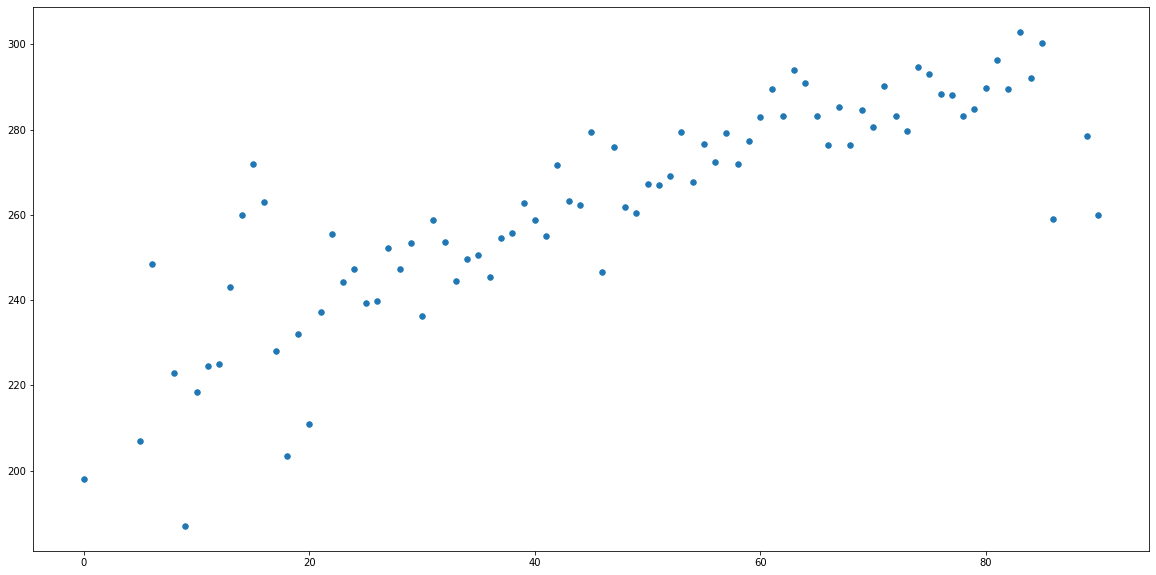

In [3]:
tempandcrime = crime_on_temp('all')
tempandcrime.head()

import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr

data1, data2 = tempandcrime.index, tempandcrime['COUNT']
covariance = np.cov(data1, data2)
print(covariance)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.scatter(tempandcrime.index,tempandcrime['COUNT'],s=30)

We got the 0.844 for Pearsons correlation score and 0.866 for Spearmans correlation score, which are high numbers for 60 samples.

However, the correlation strong between 25 to 85 degrees, so we should narrow the scope and see what happen.

- Find correlation of crime and temperature between 25 to 85 degrees.

[[315.16666667 280.59407149]
 [280.59407149 295.79419392]]
Pearsons correlation: 0.919
Spearmans correlation: 0.923


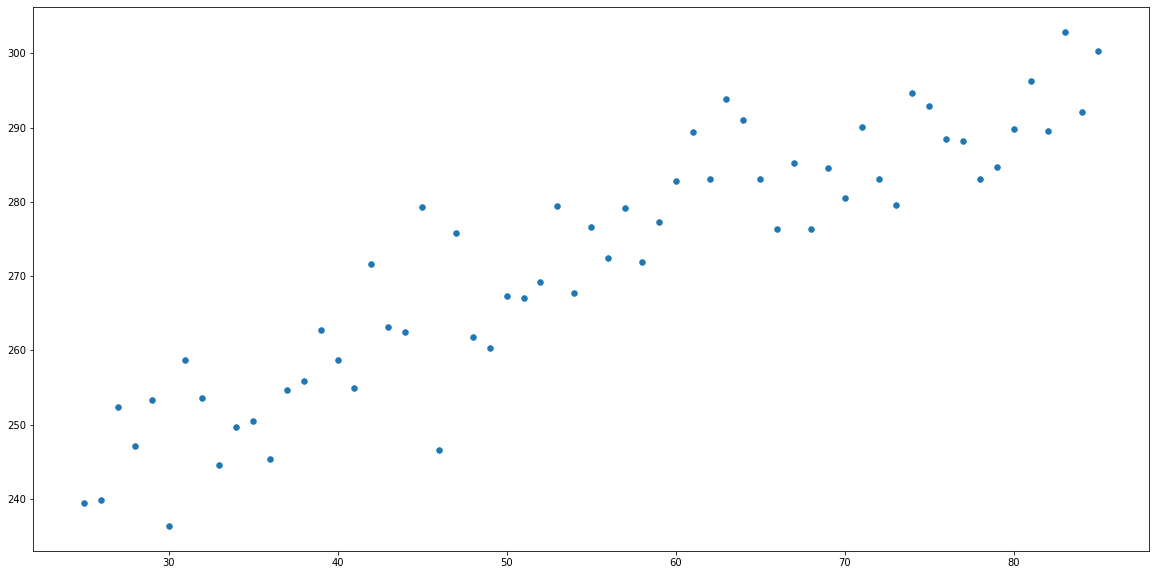

In [4]:
narrowtempandcrime = tempandcrime[(tempandcrime.index >= 25) & (tempandcrime.index <= 85)]

data1, data2 = narrowtempandcrime.index, narrowtempandcrime['COUNT']
covariance = np.cov(data1, data2)
print(covariance)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

plt.figure(figsize=(20,10))
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)

The correlation between 25 and 85 degrees is stronger than overall. <br/>
We have an assumption that snow might affect the rate of crime when the temperature is low.<br/>
Thus, we should look into the snow correlation.

- Find correlation between snow and rate of crime.

[[ 12.36759582 -26.75995854]
 [-26.75995854 869.91062229]]
Pearsons correlation: -0.258
Spearmans correlation: -0.332


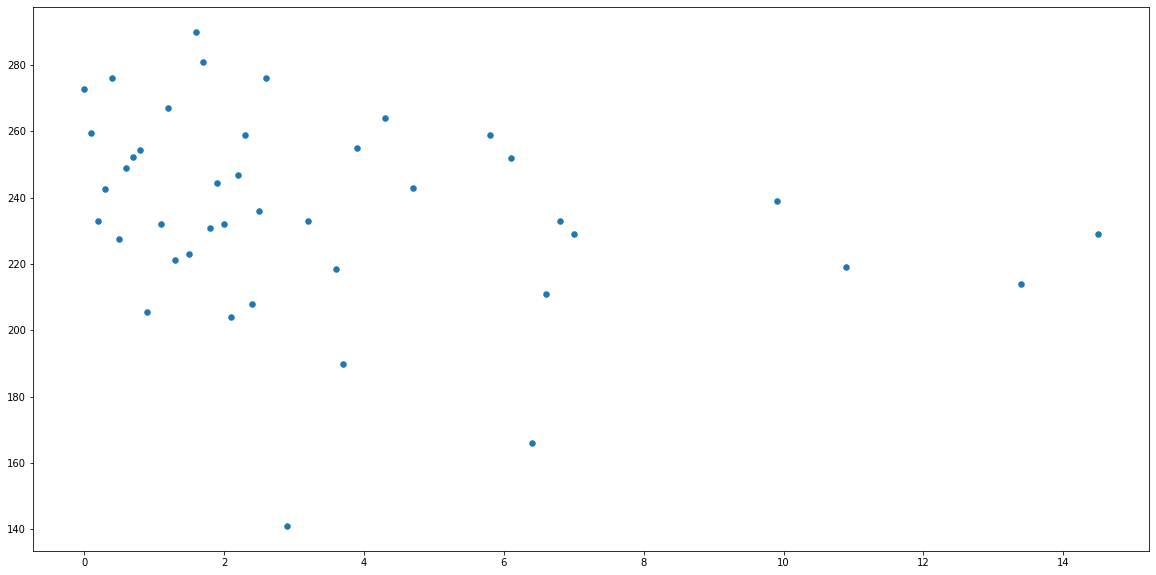

In [5]:
snowandcrime = crime_on_snow('all')

data1, data2 = snowandcrime.index, snowandcrime['COUNT']
covariance = np.cov(data1, data2)
print(covariance)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

plt.figure(figsize=(20,10))
plt.scatter(snowandcrime.index,snowandcrime['COUNT'],s=30)

Unfortunately, the correlation between snow and crime rate is not strong.

We know that there is a strong correlation between crime and temperature.<br/>
Maybe some crime will have a stronger correlation

- Count the amount of time in each group

In [6]:
crimeandweather['OFFENSE_CODE_GROUP'].value_counts().head(10)

Motor Vehicle Accident Response    49473
Larceny                            34676
Medical Assistance                 32675
Investigate Person                 24690
Other                              23966
Drug Violation                     21965
Simple Assault                     21315
Vandalism                          20091
Verbal Disputes                    17734
Investigate Property               15066
Name: OFFENSE_CODE_GROUP, dtype: int64

We will manually find the correlation for the first two groups, and use the iteration for others.

- Find the correlation between temperature and vehicle accident

Pearsons correlation: 0.080


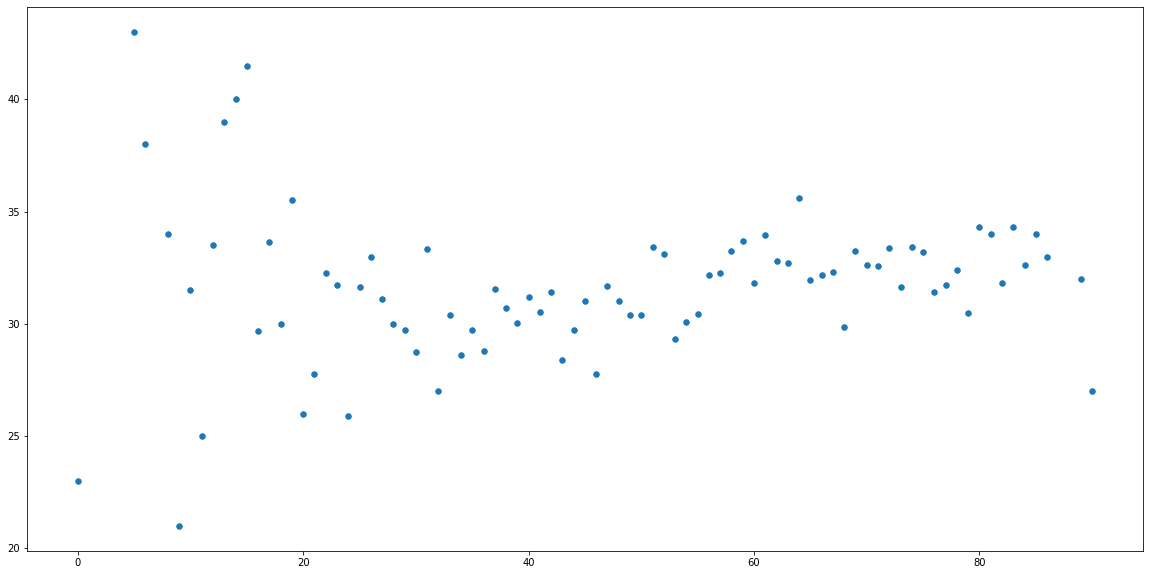

In [7]:
tempandsomecrime = crime_on_temp('Motor Vehicle Accident Response')
tempandsomecrime.head()

data1, data2 = tempandsomecrime.index, tempandsomecrime['COUNT']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

plt.figure(figsize=(20,10))
plt.scatter(tempandsomecrime.index,tempandsomecrime['COUNT'],s=30)

There almost no correlation between these two. Let's look into larceny.

- Find the correlation between temperature and larceny

Pearsons correlation: 0.793


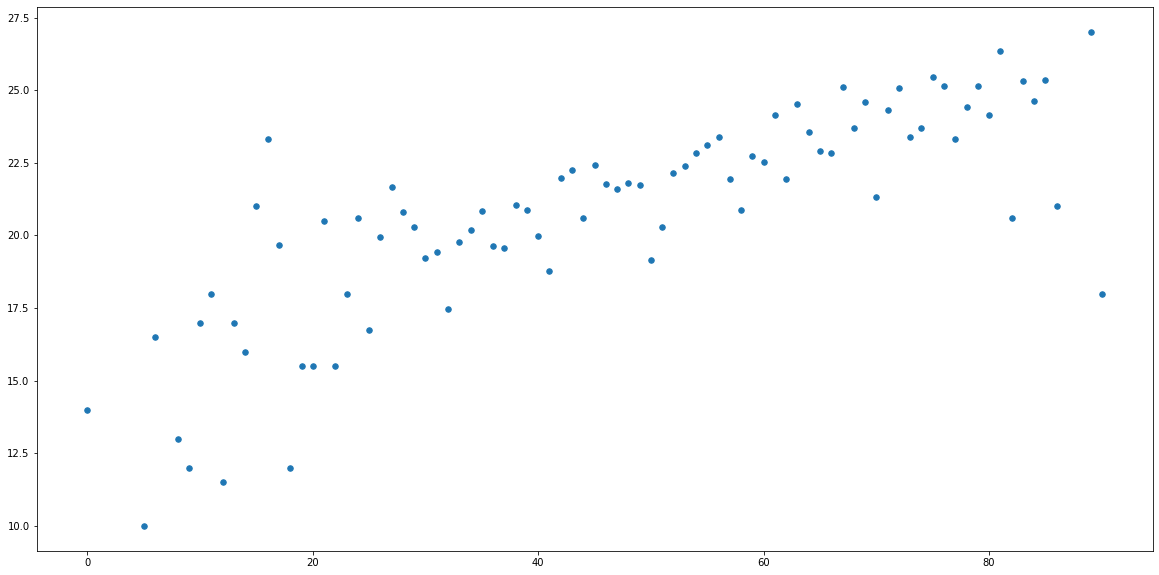

In [8]:
tempandsomecrime = crime_on_temp('Larceny')
tempandsomecrime.head()

data1, data2 = tempandsomecrime.index, tempandsomecrime['COUNT']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

plt.figure(figsize=(20,10))
plt.scatter(tempandsomecrime.index,tempandsomecrime['COUNT'],s=30)

We got a high correlation for the larceny but still less than the overall correlation.

- Find correlation for all groups

In [9]:
grouplist = crimeandweather['OFFENSE_CODE_GROUP'].unique().tolist()
corrdict = {}
for i in grouplist:
    tempandsomecrime = crime_on_temp(i)
    data1, data2 = tempandsomecrime.index, tempandsomecrime['COUNT']
    corr, _ = pearsonr(data1, data2)
    corrdict[i] = corr
corrdict

C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
C:\Users\Chaya\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = 

{nan: nan,
 'Auto Theft': 0.5176659135988123,
 'Investigate Property': 0.322312666115671,
 'Investigate Person': 0.6700786416417001,
 'Verbal Disputes': -0.08326836442767407,
 'Vandalism': 0.3694872857756251,
 'Motor Vehicle Accident Response': 0.08007117486053192,
 'Aggravated Assault': 0.6809717331316384,
 'Residential Burglary': 0.4105566691191105,
 'Larceny': 0.7928817239179312,
 'Firearm Violations': 0.27381912541951897,
 'Medical Assistance': 0.3953524424805938,
 'Simple Assault': 0.5949925766526275,
 'Missing Person Reported': 0.2649978774899975,
 'Robbery': 0.5045812801364374,
 'Property Lost': 0.2548692720126633,
 'Violations': 0.238239012589148,
 'Firearm Discovery': -0.14722819842639825,
 'Warrant Arrests': 0.6691640146602574,
 'Other': 0.18610437958834364,
 'Ballistics': 0.45068290594026206,
 'Towed': 0.35347874256109557,
 'Drug Violation': 0.47152459294344395,
 'Fire Related Reports': -0.009000193629033591,
 'Fraud': 0.2736845405627092,
 'Disorderly Conduct': 0.44020309379

No group has a stronger correlation than the overall. <br/>
Note that the burglary has only one data, so the correlation is -1.

Since we know that the correlation between temperature 25 to 85 and the crime rate is high, <br/>
for some group of crime, the correlation might be higher. Let's check it.

- Find correlation between 25 to 85 for all groups

In [10]:
grouplist = crimeandweather['OFFENSE_CODE_GROUP'].unique().tolist()
corrlist = []
corrval = []
corrdict = {}
for i in grouplist:
    tempandsomecrime = crime_on_temp(i)
    narrowtempandcrime = tempandsomecrime[(tempandsomecrime.index >= 25) & (tempandsomecrime.index <= 85)]
    data1, data2 = narrowtempandcrime.index, narrowtempandcrime['COUNT']
    corr, _ = pearsonr(data1, data2)
    corrdict[i] = corr
corrdict

C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
C:\Users\Chaya\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Chaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = 

{nan: nan,
 'Auto Theft': 0.8493208832282685,
 'Investigate Property': 0.6102252939860916,
 'Investigate Person': 0.5780488725299618,
 'Verbal Disputes': 0.5423593179892171,
 'Vandalism': 0.6052644745090546,
 'Motor Vehicle Accident Response': 0.5715369040781093,
 'Aggravated Assault': 0.69304255909629,
 'Residential Burglary': 0.39186491182993755,
 'Larceny': 0.8232265719954193,
 'Firearm Violations': 0.06416837091522755,
 'Medical Assistance': 0.4024959526862449,
 'Simple Assault': 0.6307873240006786,
 'Missing Person Reported': 0.3612206587169216,
 'Robbery': 0.32616312838116757,
 'Property Lost': 0.7280261528196452,
 'Violations': 0.07807022342221406,
 'Firearm Discovery': 0.10593989246090987,
 'Warrant Arrests': 0.41324211881528156,
 'Other': 0.6398776775803497,
 'Ballistics': 0.45439134757589966,
 'Towed': 0.334463157178456,
 'Drug Violation': 0.3351745551976074,
 'Fire Related Reports': 0.3979280116785835,
 'Fraud': 0.29129091383560607,
 'Disorderly Conduct': 0.3327092014440938,

The result is the same as above, and no group has a stronger correlation than the overall.<br/>
Let's move on to regression models

### Regression Analysis
We can use linear regression to estimate the amount of crime using temperature.
But we need to choose the right model.

- Create linear regression for overall crime and calculate accuracy

[221.87082396]
[[0.86543539]]
Mean Absolute Error: 9.301148704658162
Mean Squared Error: 181.39854241842593
Root Mean Squared Error: 13.468427614923204
R Square Score: 0.712110620211772


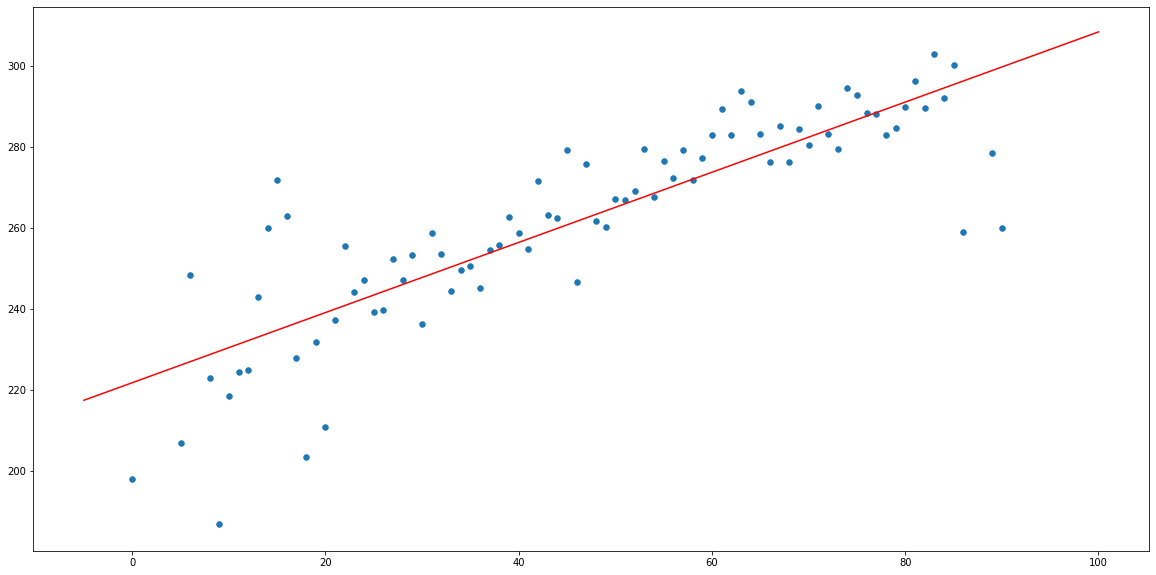

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = tempandcrime.index.values.reshape(-1,1)
y = tempandcrime['COUNT'].values.reshape(-1,1)

regressorall = LinearRegression()  
regressorall.fit(X, y) #training the algorithm

#To retrieve the intercept:
print(regressorall.intercept_)
#For retrieving the slope:
print(regressorall.coef_)
y_pred = regressorall.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

x = np.linspace(-5,100,100)
y = regressorall.coef_[0][0]*x+regressorall.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(tempandcrime.index,tempandcrime['COUNT'],s=30)

We got Root Mean Squared Error or RMSE score as 13.4, which is small compared to the dependent variable values (rate of crime). <br/> The R square score is 0.71, which is a good number. The dependent variable has a range between 190 to 320.

According to the plot, we can see that the correlation between 25 to 85 is stronger than others. <br/>
We can separate the line into two parts, less than 25 and greater 25, <br/>
and create linear regression for both parts.

- Create a linear regression for the temperature above 25

[[350.72619048 258.20408768]
 [258.20408768 287.23755926]]
Pearsons correlation: 0.814
Spearmans correlation: 0.818
[230.02664123]
[[0.73619848]]
Mean Absolute Error: 6.799782929743136
Mean Squared Error: 95.63016374790445
Root Mean Squared Error: 9.779067631829962
R Square Score: 0.661784819836623


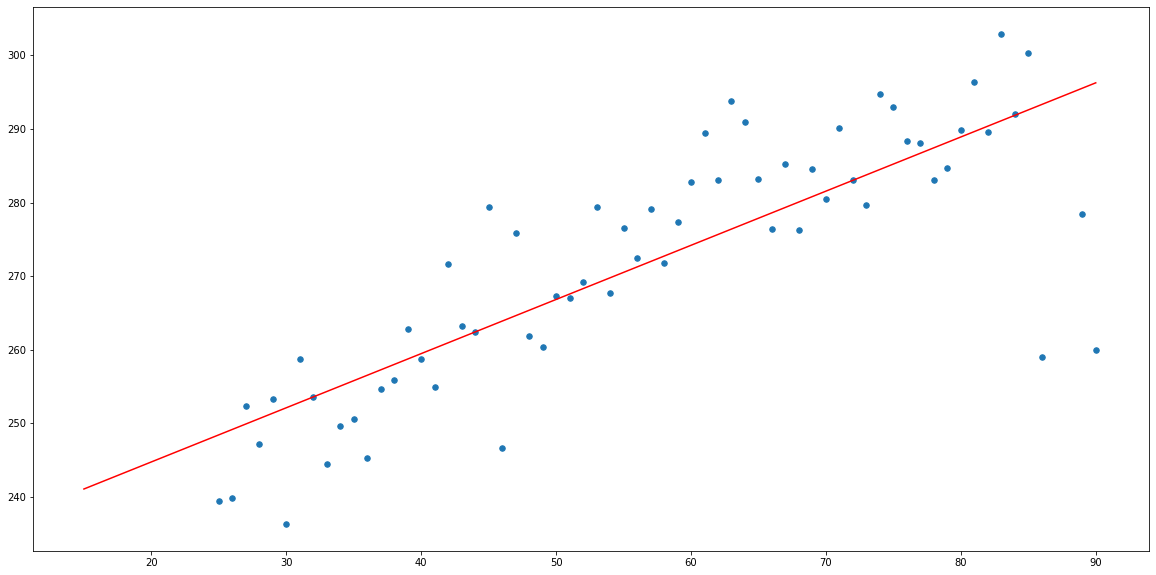

In [12]:
narrowtempandcrime = tempandcrime[tempandcrime.index >= 25]

data1, data2 = narrowtempandcrime.index, narrowtempandcrime['COUNT']
covariance = np.cov(data1, data2)
print(covariance)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

X = narrowtempandcrime.index.values.reshape(-1,1)
y = narrowtempandcrime['COUNT'].values.reshape(-1,1)

regressor85 = LinearRegression()  
regressor85.fit(X, y) #training the algorithm

#To retrieve the intercept:
print(regressor85.intercept_)
#For retrieving the slope:
print(regressor85.coef_)
y_pred = regressor85.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

x = np.linspace(15,90,100)
y = regressor85.coef_[0][0]*x+regressor85.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)

We got an RMSE score as 9.8, which is small compared to the dependent variable values. <br/>
The dependent variable has a range between 230 to 310. <br/>
However, the r square drop from 0.71 to 0.66, so this model is not better than the last one,<br/>
because the last 3 data influence the overall model.

- Create a linear regression for the temperature less than 25

[[ 42.97631579  66.64578947]
 [ 66.64578947 533.47121053]]
Pearsons correlation: 0.440
Spearmans correlation: 0.433
[209.46679934]
[[1.55075623]]
Mean Absolute Error: 15.347637009368679
Mean Squared Error: 408.6138454013839
Root Mean Squared Error: 20.214199103634652
R Square Score: 0.19373374086998274


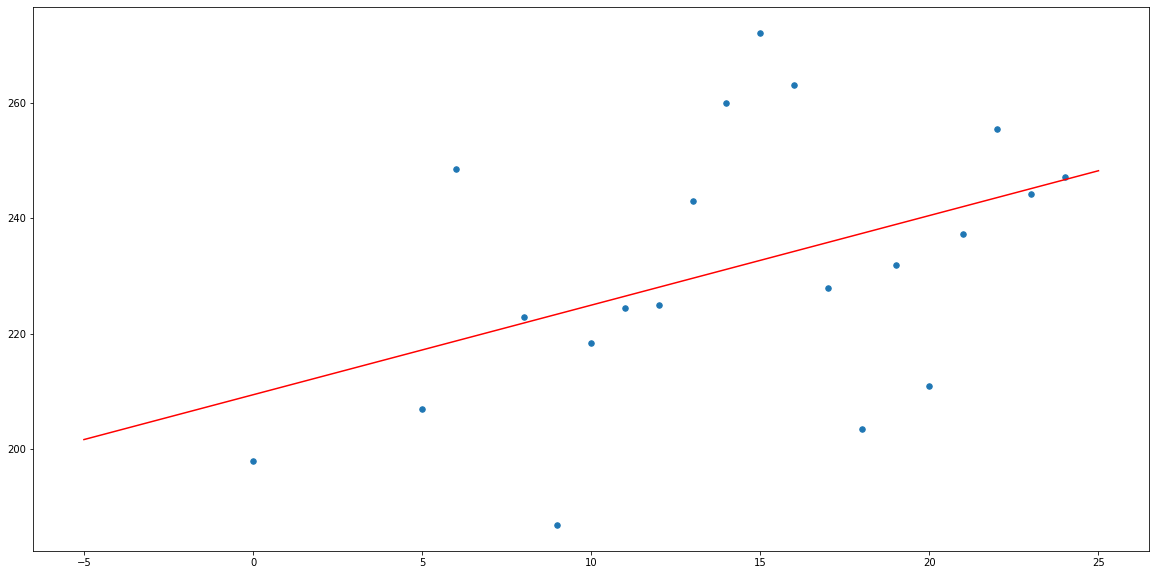

In [13]:
narrowtempandcrime = tempandcrime[tempandcrime.index < 25]

data1, data2 = narrowtempandcrime.index, narrowtempandcrime['COUNT']
covariance = np.cov(data1, data2)
print(covariance)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

X = narrowtempandcrime.index.values.reshape(-1,1)
y = narrowtempandcrime['COUNT'].values.reshape(-1,1)

regressor25 = LinearRegression()  
regressor25.fit(X, y) #training the algorithm

#To retrieve the intercept:
print(regressor25.intercept_)
#For retrieving the slope:
print(regressor25.coef_)
y_pred = regressor25.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

x = np.linspace(-5,25,100)
y = regressor25.coef_[0][0]*x+regressor25.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)

We got an RMSE score as 20.2, which is high compared to the dependent variable values. <br/>
And r square is low in this model. The dependent variable has a range between 190 to 270. <br/>
This model is worse than the model for the whole range of temperatures.

Since the model did do great work when the temperature is less than 25.<br/>
We can add more predictors such as snow, which might help the model.

### Multilinear Regression

- Create mutilinear regression

In [14]:
snowtempandcrime = crime_on_temp_and_snow('all')
snowtempandcrime['TAVG'] = snowtempandcrime.index

X = snowtempandcrime[['TAVG', 'SNOW']].values.reshape(-1,2)
y = snowtempandcrime['COUNT'].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(X, y) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df.head()

[222.58226346]
[[ 0.85630761 -1.9613214 ]]
Mean Absolute Error: 9.267268121817946
Mean Squared Error: 181.00959960329567
Root Mean Squared Error: 13.453980808790226
R Square Score: 0.7127278936712391


,Actual,Predicted
0,198.0,222.582263
1,207.0,226.863801
2,248.5,227.720109
3,223.0,229.432724
4,187.0,230.289032


Unfortunately, adding more variables does not improve the prediction much. What if we narrow the scope down to only below 25 degrees.

- Create mutilinear regression for temperature below 25

In [15]:
snowtempandcrime = crime_on_temp_and_snow('all')
snowtempandcrime['TAVG'] = snowtempandcrime.index

narrowsnowtempandcrime = snowtempandcrime[snowtempandcrime.index < 25]

X = narrowsnowtempandcrime[['TAVG', 'SNOW']].values.reshape(-1,2)
y = narrowsnowtempandcrime['COUNT'].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(X, y) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df.head()

[208.62871796]
[[ 1.66711522 -4.09834411]]
Mean Absolute Error: 15.325402580359768
Mean Squared Error: 406.1320379271043
Root Mean Squared Error: 20.152717879410318
R Square Score: 0.19863077911449634


,Actual,Predicted
0,198.0,208.628718
1,207.0,216.964294
2,248.5,218.631409
3,223.0,221.965640
4,187.0,223.632755


The result does not improve much compared with the linear regression. <br/>
We can also use polynomial regression to fit the data.

### Polynomial Regression

- Create polynomial regression

[207.60976229]
[[ 0.          1.71903976 -0.00920992]]
Mean Absolute Error: 8.706536361427089
Mean Squared Error: 155.6219762276109
Root Mean Squared Error: 12.474853755760462
R Square Score: 0.7530194365385682


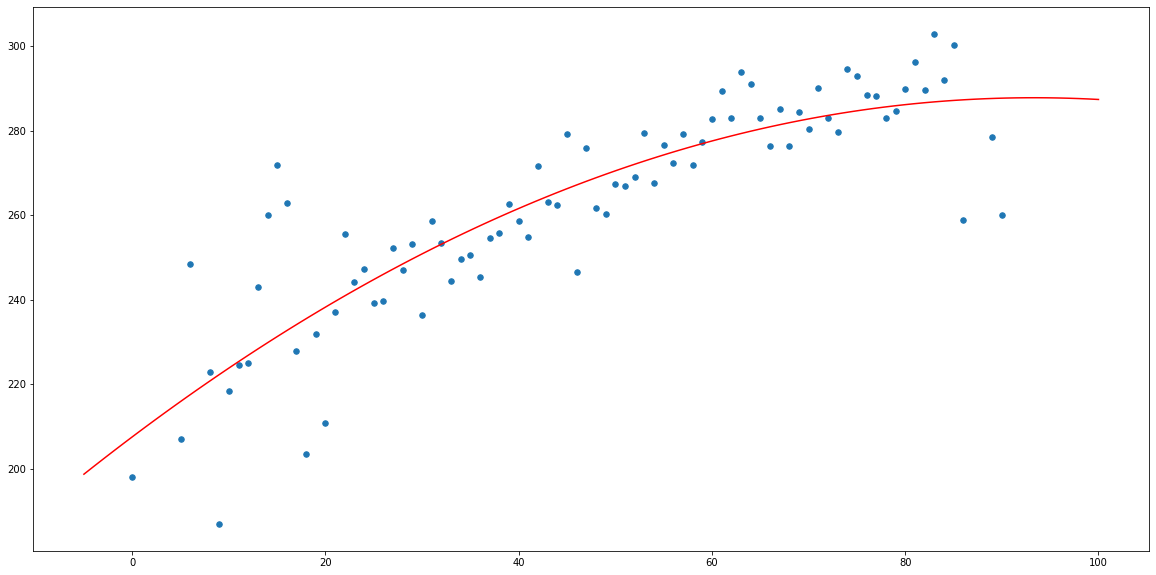

In [16]:
from sklearn.preprocessing import PolynomialFeatures 

X = tempandcrime.index.values.reshape(-1,1)
y = tempandcrime['COUNT'].values.reshape(-1,1)

# pass the order of your polynomial here  
poly = PolynomialFeatures(2)

# convert to be used further to linear regression
X_transform = poly.fit_transform(X)

regressorpoly = LinearRegression()  
regressorpoly.fit(X_transform, y) #training the algorithm

#To retrieve the intercept:
print(regressorpoly.intercept_)
#For retrieving the slope:
print(regressorpoly.coef_)

y_pred = regressorpoly.predict(X_transform)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

x = np.linspace(-5,100,100)
y = regressorpoly.coef_[0][2]*(x**2)+regressorpoly.coef_[0][1]*(x)+regressorpoly.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(tempandcrime.index,tempandcrime['COUNT'],s=30)

This model looks promising, the RMSE decrease and r square increase compare with the linear regression model.<br/>
But we still can improve the model by adding more dimensions.

- Create fourth degree polynomial regression

[200.97775038]
[[ 0.00000000e+00  3.48014528e+00 -1.09681907e-01  1.90299904e-03
  -1.13064074e-05]]
Mean Absolute Error: 8.108813958788517
Mean Squared Error: 139.33967303259138
Root Mean Squared Error: 11.804222678033119
R Square Score: 0.7788603397004334


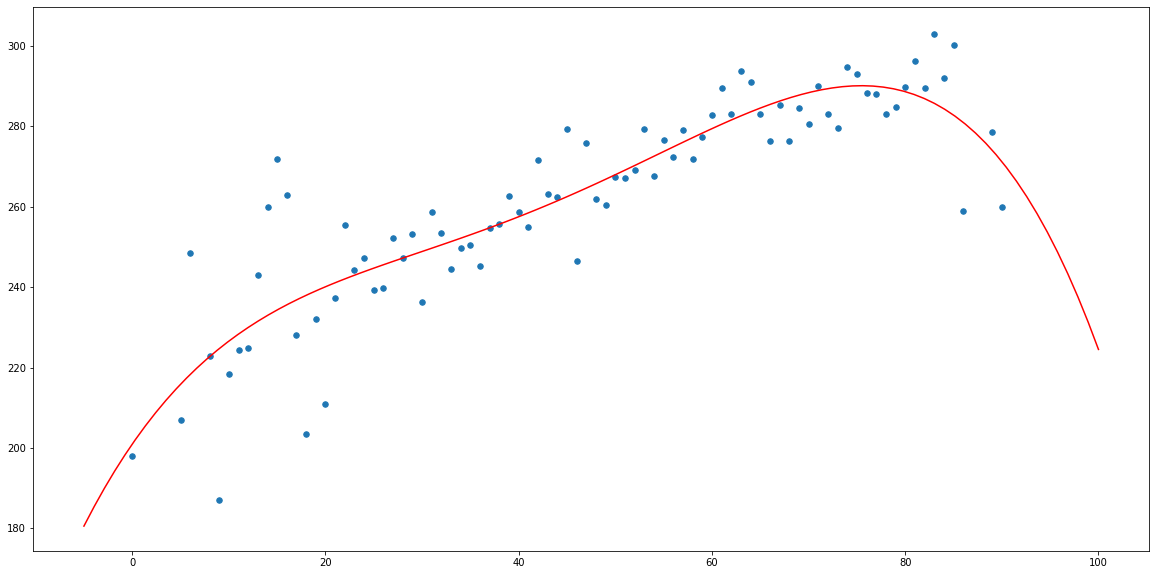

In [17]:
X = tempandcrime.index.values.reshape(-1,1)
y = tempandcrime['COUNT'].values.reshape(-1,1)

# pass the order of your polynomial here  
poly4 = PolynomialFeatures(4)

# convert to be used further to linear regression
X_transfrom = poly4.fit_transform(X)

regressorpoly4 = LinearRegression()  
regressorpoly4.fit(X_transfrom, y) #training the algorithm

#To retrieve the intercept:
print(regressorpoly4.intercept_)
#For retrieving the slope:
print(regressorpoly4.coef_)

y_pred = regressorpoly4.predict(X_transfrom)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

x = np.linspace(-5,100,100)
y = regressorpoly4.coef_[0][4]*(x**4) + \
    regressorpoly4.coef_[0][3]*(x**3) + \
    regressorpoly4.coef_[0][2]*(x**2) + \
    regressorpoly4.coef_[0][1]*(x) + \
    regressorpoly4.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(tempandcrime.index,tempandcrime['COUNT'],s=30)

The fourth degree polynomial regression has a better performance with RMSE as 11.8 and r square score as 0.78.<br/>
Let see how it work when narrow the data down to below 25

[201.54765233]
[[ 0.00000000e+00 -4.13001650e+00  1.59917298e+00 -1.13322236e-01
   2.38897447e-03]]
Mean Absolute Error: 14.530835286850438
Mean Squared Error: 376.4546835725082
Root Mean Squared Error: 19.40244014479901
R Square Score: 0.2571893662638174


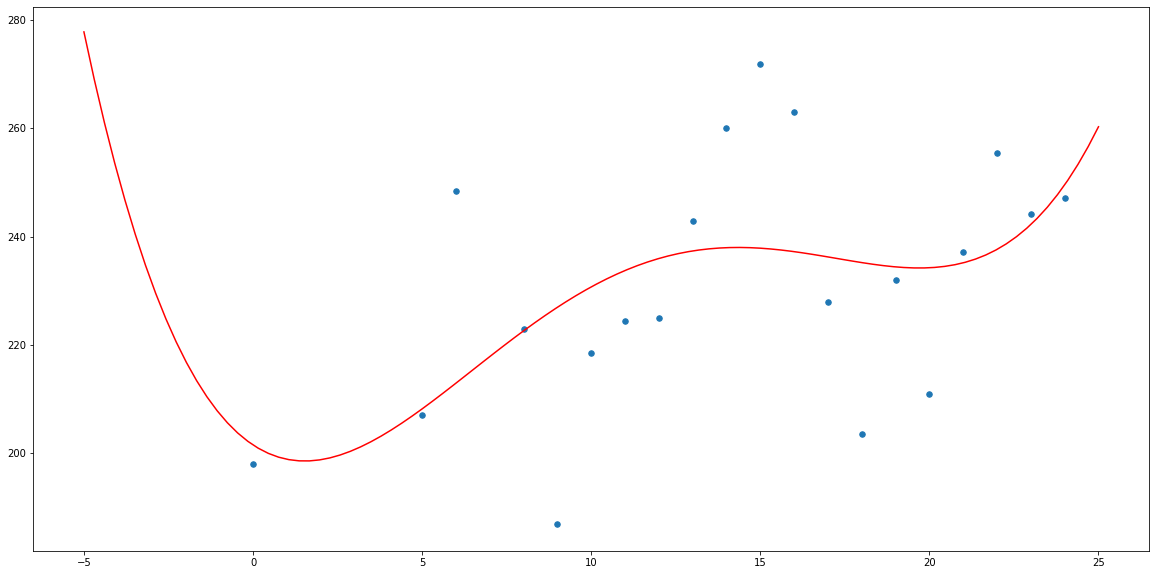

In [18]:
narrowtempandcrime = tempandcrime[tempandcrime.index < 25]

X = narrowtempandcrime.index.values.reshape(-1,1)
y = narrowtempandcrime['COUNT'].values.reshape(-1,1)

# pass the order of your polynomial here  
poly425 = PolynomialFeatures(4)

# convert to be used further to linear regression
X_transform = poly425.fit_transform(X)

regressorpoly425 = LinearRegression()  
regressorpoly425.fit(X_transform, y) #training the algorithm

#To retrieve the intercept:
print(regressorpoly425.intercept_)
#For retrieving the slope:
print(regressorpoly425.coef_)

y_pred = regressorpoly425.predict(X_transform)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

x = np.linspace(-5,25,100)
y = regressorpoly425.coef_[0][4]*(x**4) + \
    regressorpoly425.coef_[0][3]*(x**3) + \
    regressorpoly425.coef_[0][2]*(x**2) + \
    regressorpoly425.coef_[0][1]*(x) + \
    regressorpoly425.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)

This model is better than the linear regression model for the temperature below 25.<br/>
However, the RMSE still high for this range of the dependent variable.<br/>
Another downside of this model is when the temperature below 0 degrees, the prediction of the rate of crime is high.<br/>
We will reduce the degree of the polynomial.

- Create Third degree polynomial regression for temperature below 25

[196.9797635]
[[ 0.00000000e+00  4.71955194e+00 -1.87383472e-01  2.86239207e-03]]
Mean Absolute Error: 15.293480825423538
Mean Squared Error: 394.0106136362966
Root Mean Squared Error: 19.849700593114665
R Square Score: 0.2225484596538747


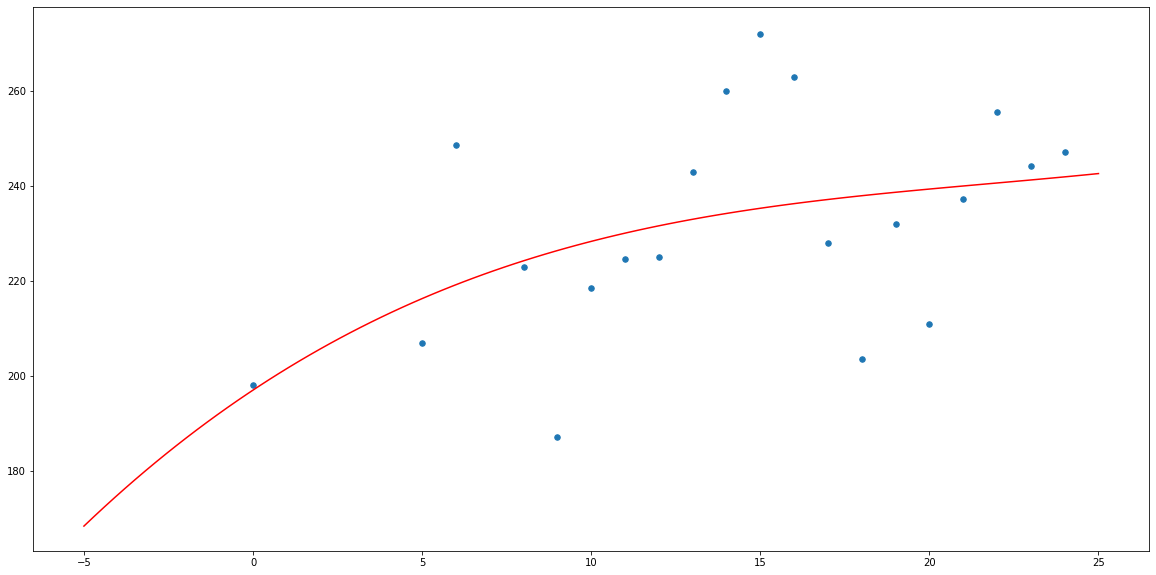

In [19]:
narrowtempandcrime = tempandcrime[tempandcrime.index < 25]

X = narrowtempandcrime.index.values.reshape(-1,1)
y = narrowtempandcrime['COUNT'].values.reshape(-1,1)

# pass the order of your polynomial here  
poly325 = PolynomialFeatures(3)

# convert to be used further to linear regression
X_transform = poly325.fit_transform(X)

regressorpoly325 = LinearRegression()  
regressorpoly325.fit(X_transform, y) #training the algorithm

#To retrieve the intercept:
print(regressorpoly325.intercept_)
#For retrieving the slope:
print(regressorpoly325.coef_)

y_pred = regressorpoly325.predict(X_transform)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

x = np.linspace(-5,25,100)
y = regressorpoly325.coef_[0][3]*(x**3) + \
    regressorpoly325.coef_[0][2]*(x**2) + \
    regressorpoly325.coef_[0][1]*(x) + \
    regressorpoly325.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)

### Final model

We want to create a prediction api for the rate of crime, so we need to choose a model for the prediction.<br/>
We decided to use the fourth degree polynomial to be a prediction model.<br/>
However, we need to check the validity of the model first. <br/>
The simplest way to check is to check the distribution of residual or error.

- Collect error from the fourth degree polynomial regression and test normality

Mean Absolute Error: 8.108813958788517
Mean Squared Error: 139.33967303259138
Root Mean Squared Error: 11.804222678033119
R Square Score: 0.7788603397004334


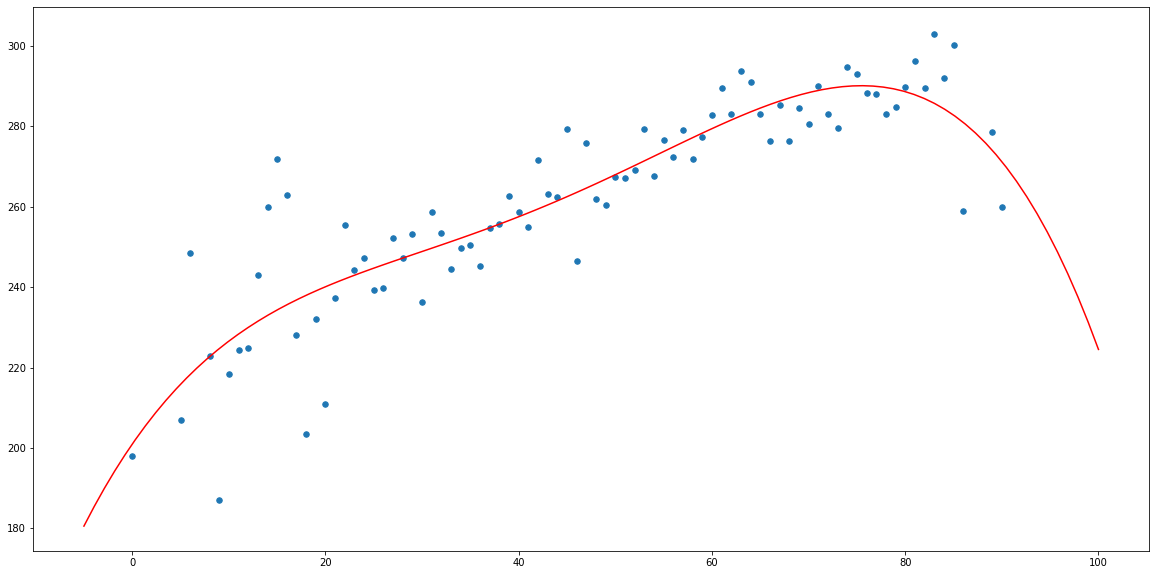

In [20]:
X = tempandcrime.index.values.reshape(-1,1)
y = tempandcrime['COUNT'].values.reshape(-1,1)

# convert to be used further to linear regression
X_transfrom = poly4.transform(X)

y_pred = regressorpoly4.predict(X_transfrom)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

error = y-y_pred

x = np.linspace(-5,100,100)
y = regressorpoly4.coef_[0][4]*(x**4)+regressorpoly4.coef_[0][3]*(x**3)+regressorpoly4.coef_[0][2]*(x**2)+regressorpoly4.coef_[0][1]*(x)+regressorpoly4.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(tempandcrime.index,tempandcrime['COUNT'],s=30)

Pearson normality test
p value = 0.010570529303523332
Shapiro normality test
test statistic = 0.9320165514945984
p value = 0.0002578222192823887


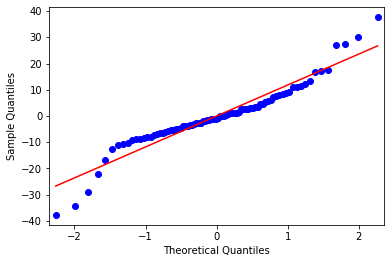

In [21]:
from scipy import stats
k2, p = stats.normaltest(error.T[0]) # D’Agostino and Pearson’s
alpha = 0.05
print("Pearson normality test")
print("p value =",p)

t, p = stats.shapiro(error.T[0])
print("Shapiro normality test")
print("test statistic =",t)
print("p value =",p)

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(error.T[0], line='s')
pyplot.show()

Unfortunately, the p-value is larger than 0.05, so the residual distribution is not normal.<br/>
We move our second best, which is the second degree polynomial distribution.

- Collect error from the second degree polynomial regression and test normality

Mean Absolute Error: 8.706536361427089
Mean Squared Error: 155.6219762276109
Root Mean Squared Error: 12.474853755760462
R Square Score: 0.7530194365385682


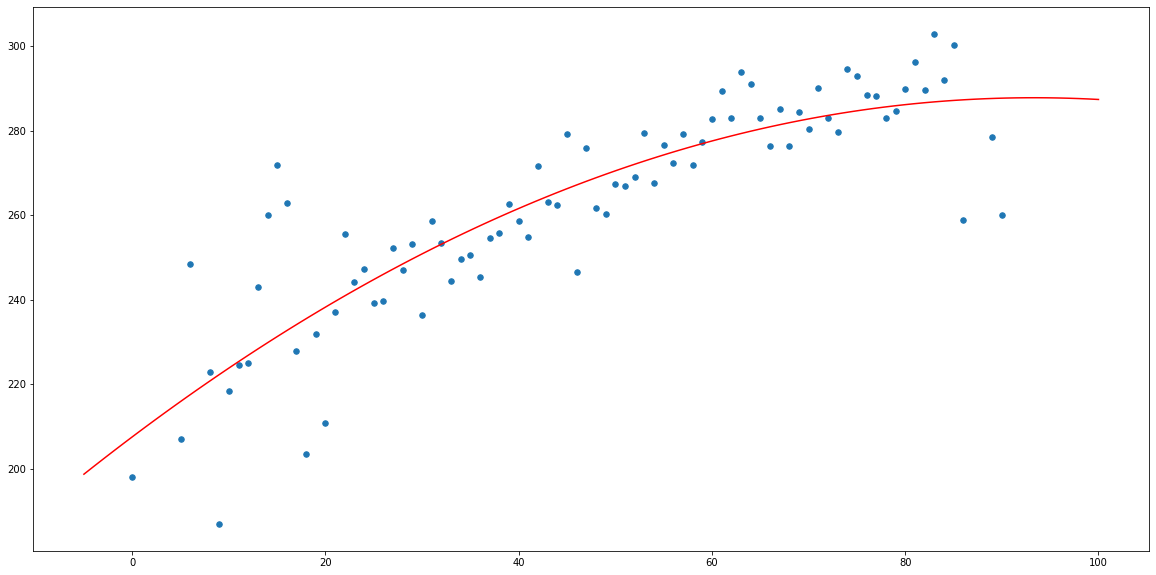

In [22]:
X = tempandcrime.index.values.reshape(-1,1)
y = tempandcrime['COUNT'].values.reshape(-1,1)

X_transfrom = poly.transform(X)

y_pred = regressorpoly.predict(X_transfrom)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

error = y-y_pred
# print(error)

x = np.linspace(-5,100,100)
y = regressorpoly.coef_[0][2]*(x**2)+regressorpoly.coef_[0][1]*(x)+regressorpoly.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(tempandcrime.index,tempandcrime['COUNT'],s=30)

Pearson normality test
p value = 0.02007001884498343
Shapiro normality test
test statistic = 0.9310206770896912
p value = 0.00022877893934492022


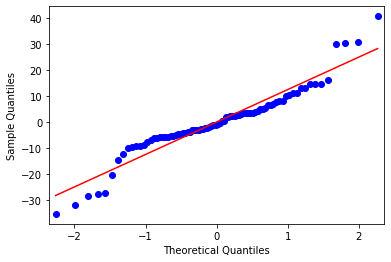

In [23]:
k2, p = stats.normaltest(error.T[0]) # D’Agostino and Pearson’s
alpha = 0.05
print("Pearson normality test")
print("p value =",p)
    
t, p = stats.shapiro(error.T[0])
print("Shapiro normality test")
print("test statistic =",t)
print("p value =",p)

# q-q plot
qqplot(error.T[0], line='s')
pyplot.show()

The error of this model still is not normally distributed.<br/>
We will check the linear regression too.

- Collect error from the linear regression and test normality

Mean Absolute Error: 9.301148704658162
Mean Squared Error: 181.39854241842593
Root Mean Squared Error: 13.468427614923204
R Square Score: 0.712110620211772


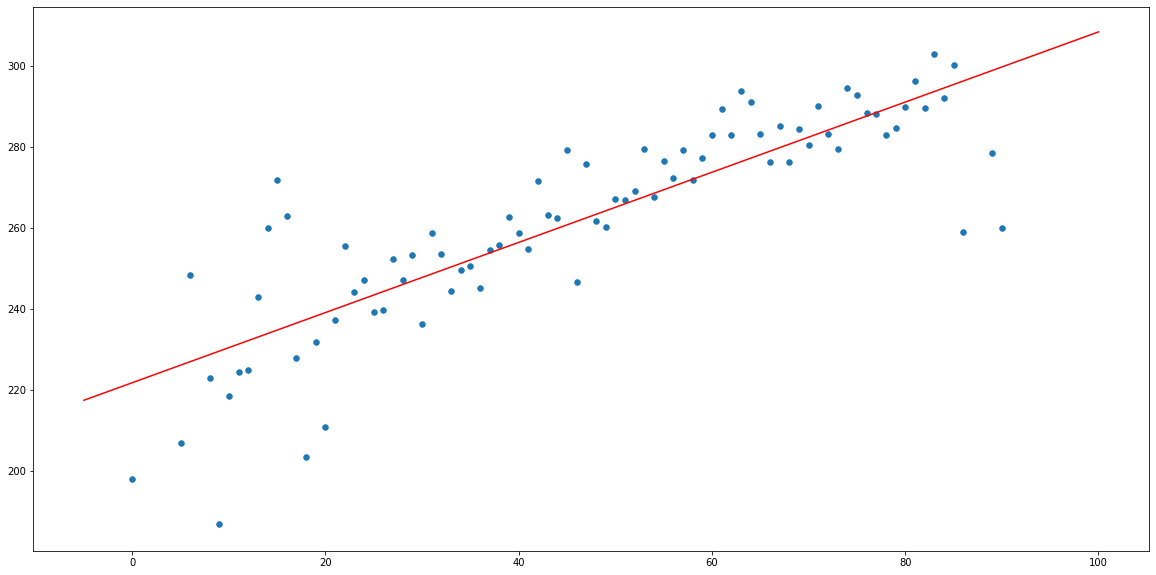

In [24]:
X = tempandcrime.index.values.reshape(-1,1)
y = tempandcrime['COUNT'].values.reshape(-1,1)

y_pred = regressorall.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

error = y-y_pred

x = np.linspace(-5,100,100)
y = regressorall.coef_[0][0]*x+regressorall.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(tempandcrime.index,tempandcrime['COUNT'],s=30)

Pearson normality test
p value = 0.0003869045656338039
Shapiro normality test
test statistic = 0.9243564009666443
p value = 0.00010483318328624591


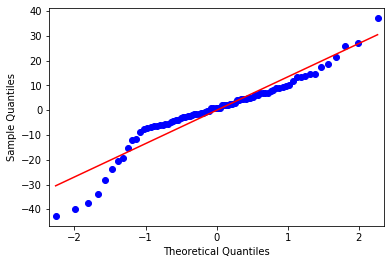

In [25]:
k2, p = stats.normaltest(error.T[0]) # D’Agostino and Pearson’s
alpha = 0.05
print("Pearson normality test")
print("p value =",p)
    
t, p = stats.shapiro(error.T[0])
print("Shapiro normality test")
print("test statistic =",t)
print("p value =",p)

# QQ Plot
# q-q plot
qqplot(error.T[0], line='s')
pyplot.show()

Seem like there is no model that valid. <br/>
We can split the data into two parts and create a different model for each one. <br/>
We split the data into two parts, below 25 and above, and use the fourth polynomial regression for both data.

- Collect error from the fourth degree polynomial regression for temperature above 25 and test normality

Mean Absolute Error: 5.9255833585727835
Mean Squared Error: 58.98311553410656
Root Mean Squared Error: 7.680046584110448
R Square Score: 0.7913944276038921


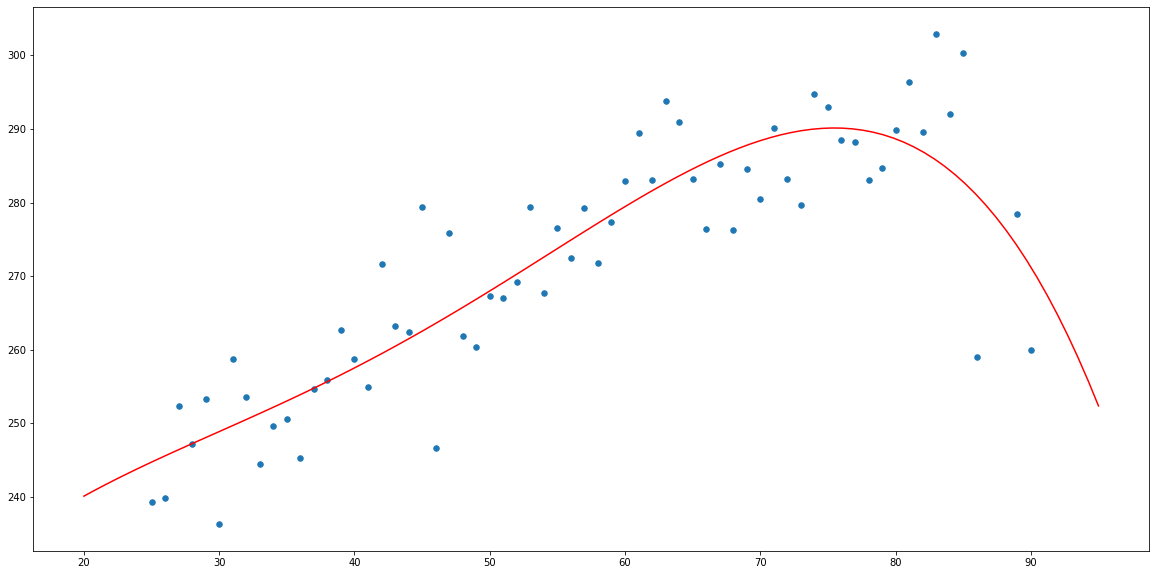

In [26]:
narrowtempandcrime = tempandcrime[tempandcrime.index >= 25]

X = narrowtempandcrime.index.values.reshape(-1,1)
y = narrowtempandcrime['COUNT'].values.reshape(-1,1)

# convert to be used further to linear regression
X_transfrom = poly4.transform(X)

y_pred = regressorpoly4.predict(X_transfrom)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

error = y-y_pred

x = np.linspace(20,95,100)
y = regressorpoly4.coef_[0][4]*(x**4) + \
    regressorpoly4.coef_[0][3]*(x**3) + \
    regressorpoly4.coef_[0][2]*(x**2) + \
    regressorpoly4.coef_[0][1]*(x) + \
    regressorpoly4.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)

Pearson normality test
p value = 0.5942672581098671
Shapiro normality test
test statistic = 0.9881580471992493
p value = 0.7998060584068298


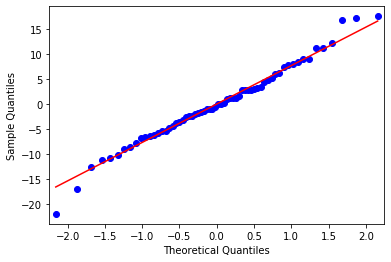

In [27]:
k2, p = stats.normaltest(error.T[0]) # D’Agostino and Pearson’s
alpha = 0.05
print("Pearson normality test")
print("p value =",p)

t, p = stats.shapiro(error.T[0])
print("Shapiro normality test")
print("test statistic =",t)
print("p value =",p)

# QQ Plot
qqplot(error.T[0], line='s')
pyplot.show()

Fortunately, the error of this model is normally distributed. 

- Collect error from the third degree polynomial regression for temperature below 25 and test normality

Mean Absolute Error: 15.293480825423538
Mean Squared Error: 394.0106136362966
Root Mean Squared Error: 19.849700593114665
R Square Score: 0.2225484596538747


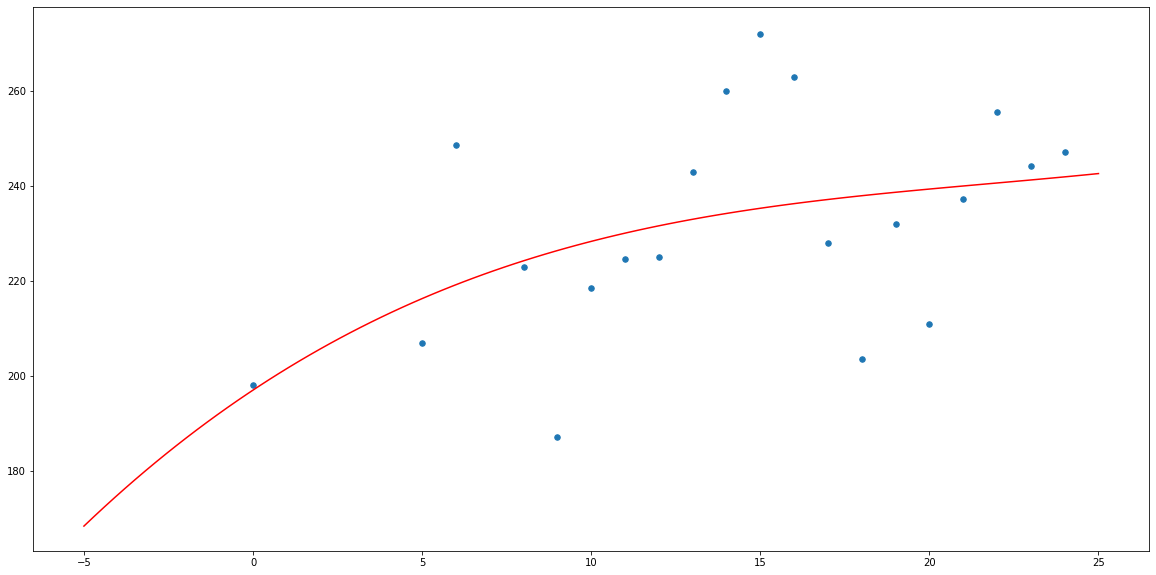

In [28]:
narrowtempandcrime = tempandcrime[tempandcrime.index < 25]

X = narrowtempandcrime.index.values.reshape(-1,1)
y = narrowtempandcrime['COUNT'].values.reshape(-1,1)

# convert to be used further to linear regression
X_transfrom = poly325.transform(X)

y_pred = regressorpoly325.predict(X_transfrom)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square Score:', metrics.r2_score(y, y_pred))  

error = y-y_pred

x = np.linspace(-5,25,100)
y = regressorpoly325.coef_[0][3]*(x**3) + \
    regressorpoly325.coef_[0][2]*(x**2) + \
    regressorpoly325.coef_[0][1]*(x) + \
    regressorpoly325.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)

Pearson normality test
p value = 0.9837037245947441
Shapiro normality test
test statistic = 0.9573425054550171
p value = 0.4922215938568115


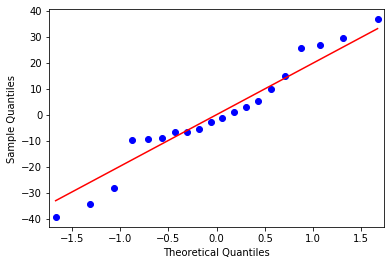

In [29]:
k2, p = stats.normaltest(error.T[0]) # D’Agostino and Pearson’s
alpha = 0.05
print("Pearson normality test")
print("p value =",p)

t, p = stats.shapiro(error.T[0])
print("Shapiro normality test")
print("test statistic =",t)
print("p value =",p)

# QQ Plot
qqplot(error.T[0], line='s')
pyplot.show()

The residual of this model is also normally distributed.<br/>
We will use the last two models for our api.

### Export model

In [33]:
from sklearn.externals import joblib
import json

joblib.dump(regressorpoly4, open('../model/regressorpoly4.sav', 'wb'))
joblib.dump(regressorpoly325, open('../model/regressorpoly325.sav', 'wb'))
joblib.dump(poly4, open('../model/poly4.sav', 'wb'))
joblib.dump(poly425, open('../model/poly425.sav', 'wb'))

export = {}
export['regressorpoly4'] = {'intercept': regressorpoly4.intercept_.tolist(), 'coef': regressorpoly4.coef_.tolist() }
export['regressorpoly325'] = {'intercept': regressorpoly325.intercept_.tolist(), 'coef': regressorpoly325.coef_.tolist() }
file = open("../model/regression.txt","w+") 
file.write(json.dumps(export))

300

- Test the exprted models

Mean Absolute Error: 14.530835286850438
Mean Squared Error: 376.4546835725082
Root Mean Squared Error: 19.40244014479901


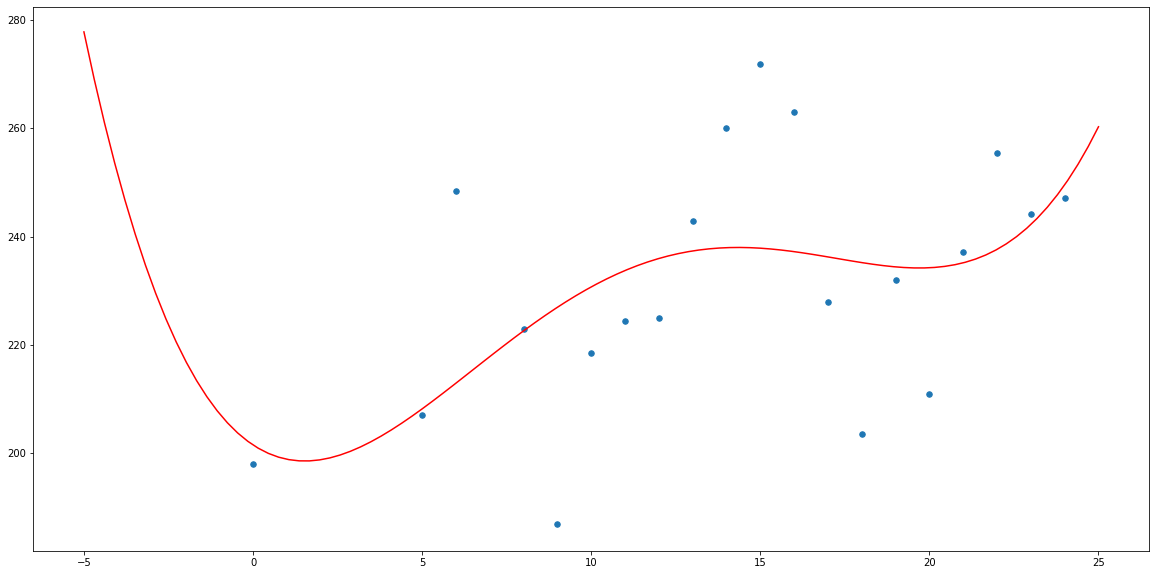

In [31]:
narrowtempandcrime = tempandcrime[tempandcrime.index < 25]

X = narrowtempandcrime.index.values.reshape(-1,1)
y = narrowtempandcrime['COUNT'].values.reshape(-1,1)

regressor = joblib.load('../model/regressorpoly425.sav')

X_tran = poly425.transform(X)

y_pred = regressor.predict(X_tran)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

x = np.linspace(-5,25,100)
y = regressor.coef_[0][4]*(x**4) + \
    regressor.coef_[0][3]*(x**3) + \
    regressor.coef_[0][2]*(x**2) + \
    regressor.coef_[0][1]*(x) + \
    regressor.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)

[200.97775038]
[[ 0.00000000e+00  3.48014528e+00 -1.09681907e-01  1.90299904e-03
  -1.13064074e-05]]
Mean Absolute Error: 5.9255833585727835
Mean Squared Error: 58.98311553410656
Root Mean Squared Error: 7.680046584110448


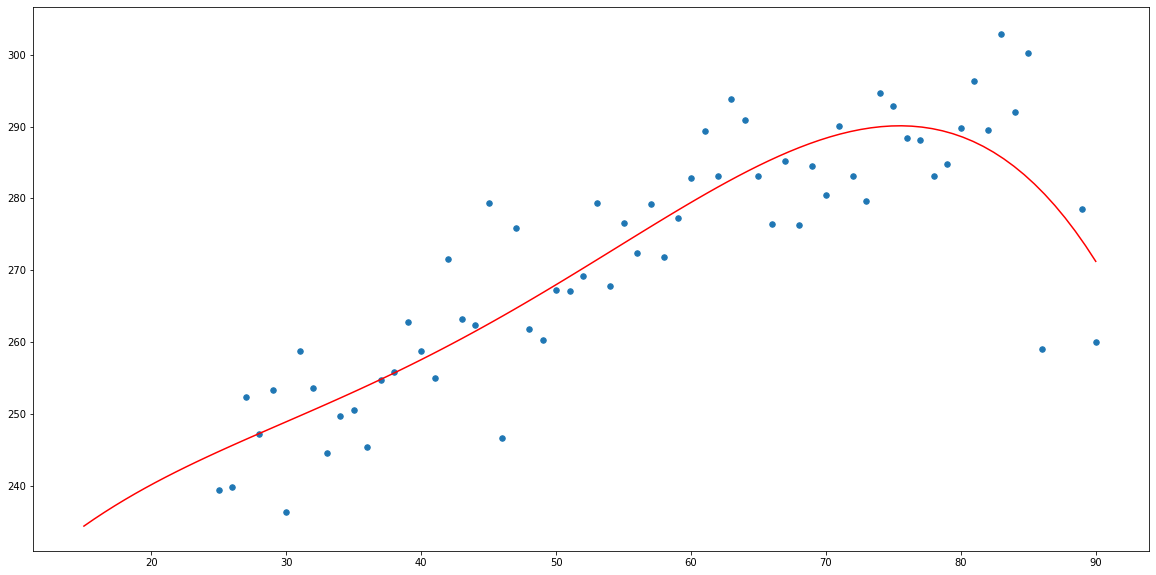

In [32]:
narrowtempandcrime = tempandcrime[tempandcrime.index >= 25]

X = narrowtempandcrime.index.values.reshape(-1,1)
y = narrowtempandcrime['COUNT'].values.reshape(-1,1)

regressor = joblib.load('../model/regressorpoly4.sav')

X_tran = poly425.transform(X)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_tran)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

x = np.linspace(15,90,100)
y = regressor.coef_[0][4]*(x**4) + \
    regressor.coef_[0][3]*(x**3) + \
    regressor.coef_[0][2]*(x**2) + \
    regressor.coef_[0][1]*(x) + \
    regressor.intercept_[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, '-r')
plt.scatter(narrowtempandcrime.index,narrowtempandcrime['COUNT'],s=30)